# 0.1 Installing Qiskit

Here, we provide an overview of working with Qiskit. 

Before we begin, let's make sure we have a working development environment

1. **Install anaconda.** https://www.anaconda.com/products/individual <br> <br>
    
    
2. **Install qiskit** <br>
    In the anaconda prompt type create a new environment using the command `conda create -n qiskit python=3`. Then activate the enviroment with `conda activate qiskit`. Finally install the package with `pip install qiskit` (or pip install qiskit[visualization]) <br> <br>
    ***NOTE TO WINDOWS USERS***
    <blockquote>
    You may need to download some C++ libraries for windows which aren't available by default. :(  If you get an error when doing <code>pip install qiskit</code> this could be the issue.<br> <br>
    1. Download and install the visual studio installer: 
<a href="https://visualstudio.microsoft.com/downloads/ ">https://visualstudio.microsoft.com/downloads/ </a><br>
    2. Under Visual Studio Build Tools, check the <code>Desktop development with C++</code> and additionally select
        <ul>
            <li> MSCV v142 - VS 2019 C++ x86/64 build tools </li>
        <li> Windows 10 SDK </li>
        <li> C++ CMake tools for Windows </li>
    </ul>
    <br>
    3. Let the installer download and install the C++ libraries you've selected
    </blockquote>



4. **Install miscellaneous packages** Install the following packages to ensure all the lab notebooks will cooperate 
    1. `pip install matplotlib`
    1. `pip install pylatexenc`
    1. `pip install qiskit-aer`
    1. `pip install kaleidoscope`
    1. `pip install jupyter`
    1. `pip install qiskit-ibm-provider`
    1. `pip install qiskit-ibm-runtime`



# 0.2 Creating an IBMid

Next go to https://quantum-computing.ibm.com/ and create and IBMid account to access the IBM Quantum services.
<img src="./resources/IBM-quantum-services.png" alt="IBM Quantum Services login page" style="width: 1000px;"/>

***

Once you have created an account, on the main dashbaord of the website will be your API token.  You'll need it in order to submit your circuits to the backends you have access to.
<img src="./resources/iqp-dashboard.png" alt="IBM Quantum dashboard page" style="width: 1000px;"/>

***

From this dashboard you should be able to see all of the compute resources available to you.  These include our superconducting hardware as well as several quantum simulators.

<img src="./resources/compute-resources.png" alt="Quantum Resources" style="width: 1000px;"/>

# 0.3 Using Qiskit

The fundamental unit you will primarily work with in Qiskit is the `QuantumCircuit` object. The basic workflow to using Qiskit consists of two stages: build and execute. Building involves making different quantum circuits which represent the problem/algorithm you are solving. Executing takes care of the, well, *execution* of those circuits as a job or set of jobs to be run on either real or simulated hardware. After the jobs have been run, the data is collected and must be postprocessed depending on the desired output.

In [1]:
import qiskit as qk
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit_aer import AerProvider, AerSimulator
from qiskit.compiler import transpile

from qiskit_ibm_provider import IBMProvider

#Store your API token locally (only need to do once)
#IBMProvider.save_account(token='MY_API_TOKEN')
provider = IBMProvider()


#make sure your qiskit version is up to date
qk.__qiskit_version__

{'qiskit-terra': '0.25.0', 'qiskit': '0.44.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## 0.3.1 Building the circuit 

The basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumCircuit comprised of two qubits.

In [2]:
# Create a Quantum Circuit acting on a quantum register of two qubits
circ = QuantumCircuit(2)
print(circ)

     
q_0: 
     
q_1: 
     


We can then add gates to the circuit. We start with a Hadamard gate acting on qubit $0$ and then add a $C_X$ (CNOT) gate using $0$ as the control qubit and $1$ as the target. 

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)

You can visualize your circuit using Qiskit QuantumCircuit.draw(), which plots the circuit in the form found in many textbooks.

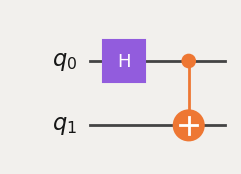

In [4]:
circ.draw('mpl')

In [5]:
#One can also draw this in markdown
circ.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

[This tutorial](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html) covers many of the circuit visualization tools that are available.

A few of the basic gates which can be added to a quantum circuit are the:

* Pauli $X$, $Y$, $Z$ gates
* Hadamard $H$ gate
* $S$ (or $\pi/2$) phase gate
* $T$ (or $\pi/4$) phase gate
* Controlled-NOT (or Controlled-$X$) gate
* Controlled-$H$ gate
* CCX or Toffoli gate

among many others.  [This tutorial](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) walks through many more which are available and demonstrates the syntax for each gate desired.

# 0.4 Simulating a circuit and Executing on real hardware

Qiskit circuits can be simulated or run on real IBM hardware. Below is the list of real backends avaliable with your IBM accounts. 

In [6]:
instance="ibm-q/open/main"
provider = IBMProvider(instance=instance)

#List out all the backends avaiable from each provider you have access to
# print("INSTANCES AVAILABLE")
# for instance in provider.instances():
#     print("#################################")
#     print(instance)
#     tmp_provider = IBMProvider(instance=instance)
#     print("\nBACKENDS AVAILABLE")
#     for backend in tmp_provider.backends():
#         print(backend.name)

#List out all backends avaiable for a provider
for backend in provider.backends():
    print(backend.name)





simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_lagos
ibm_perth
ibmq_quito
ibmq_lima
ibmq_belem
simulator_mps
simulator_statevector
ibmq_jakarta
ibmq_qasm_simulator


Running a circuit on real hardware requires us to add classical registers for the measurements to be stored to.

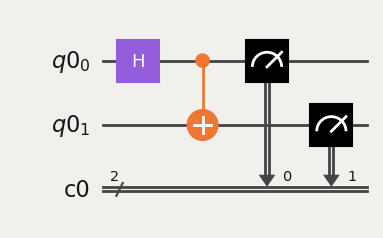

In [7]:
#Create the circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc = QuantumCircuit(q,c)
# we can also write "qc = QuantumCircuit(2,2)"

#Add the hadamard and CNOT gates to the circuit
qc.h(0)
qc.cx(0, 1)

#add measurements
qc.measure(0,0)
qc.measure(1,1)

qc.draw('mpl')

Let's try simulating the measurement of circuit from before using the `AerSimulator` backend.  This will simulate the quantum circuit on your local machine.  (Which is useful for testing out algorithms before sending it to the real thing!) 

It also turns out this simulator is quite useful for us to test out our quantum algorithms.  There are a large variety of configuration options this object can be created with including noise models, simulate and return ending state vector rather than a vector of measurements, simulating the circuit using the density matrix represenation, and more.  


Feel free to read more about these configuration options in the docs: https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator

## 0.4.1 Running on Ideal Simulator

In [8]:
#Define a backend object to run the circuit on
provider = IBMProvider(instance="ibm-q/open/main")
backend = AerSimulator() #Calling AerSimulator with no config options will return a noiseless shot-based simulator


#If desired, we can also use ibm's cloud-based classical computers to simulate our circuit:
#backend = provider.get_backend('ibmq_qasm_simulator')


#Define the shots
shots = 8192

#run the job with the run method
job = backend.run(qc, shots=shots)

# get the results of the job
sim_results = job.result()


sim_counts = sim_results.get_counts(qc)

#Raw count data is stored in the Result object as a dict
print(sim_counts)

{'00': 4161, '11': 4031}


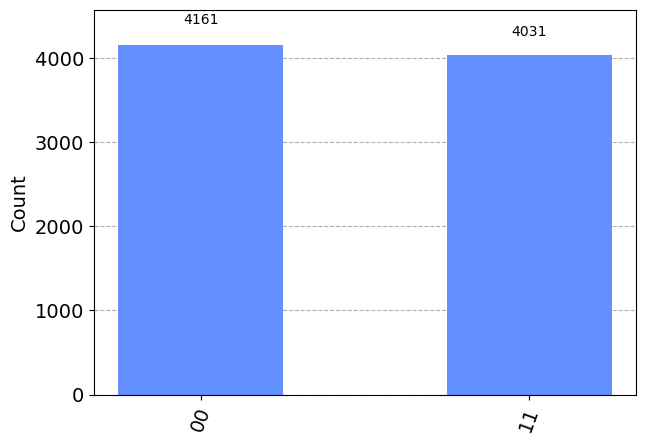

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_counts)

## 0.4.2 Running on Real Backend

We can also execute this circuit on real hardware by changing the backend and transpiling to be compatible with that backend.  Learn more about the transpiler, passes, and other configuration options here:

https://qiskit.org/documentation/apidoc/transpiler.html

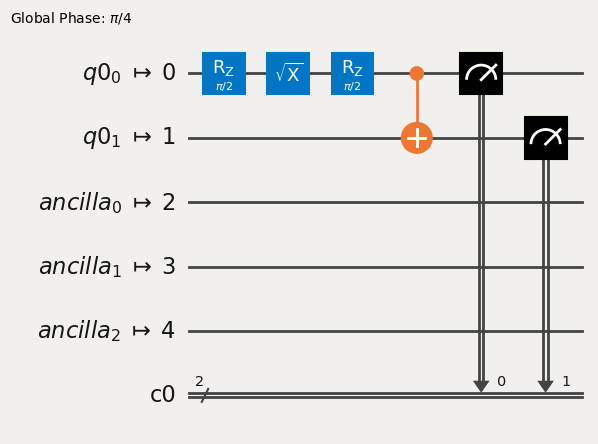

In [10]:
#We will use the imb_lagos backend
backend = provider.get_backend('ibmq_manila')

#Optional: Here we can specify a specific qubit layout to assign our circuit to the backend
initial_layout = [0,1]

'''
    Here we'll use the transpiler to optimize our circuit for the backend we've chosen.  Notice how the Hadamard gate has been
    decomposed into two Rz rotations and a sqrt(X) gate.  There are many different transpiler 'passes' which can be configured 
    in order to reduce and mitigate errors when we run these circuits on real hardware.  Exploring these is beyond the lab, but
    feel free to learn more by checking the documentation.
'''
qc_trans = transpile(qc, backend, initial_layout=initial_layout, optimization_level=3)
qc_trans.draw('mpl')

Try above without the `initial_layout` parameter in the `transpile` call.  
**What do you notice?**

In [11]:
type(backend)
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print('Operational?: {} \n Jobs in Queue: {}'.format(is_operational, jobs_in_queue))

Operational?: True 
 Jobs in Queue: 373


Following code-blocks can be used to run our circuit on the chosen real backend `ibmq_manila`.  
For the sake of time, we will skip running on a real HW. Instead, we will use noisy simulator with `ibmq_manila`s properties.

In [12]:
#To run on real hardware, we will use the `execute` function.
# This function returns a job object that contains
# metadata about our cirucit, backend choices, and the number of shots among other things.

# execute does not transpiled circuit
# job = execute(qc_trans, backend, shots=shots)

# Alternate `backend.run()`. Requires transpiled circuit
# job = backend.run(qc_trans, shots=shots)

# print(job.job_id())
#We can also print the id of the job.  Any job you submit to ibm's cloud services will have a unique job id.  These
# job ids can also be used to download the results data of your job at a later time



In [13]:
#Check on the status of our job
# print(job.status())
# print(type(job))

In [14]:
# get the results of the job
# hardware_results = backend.retriev_job(job.job_id())
# hardware_results = job.result()
# hardware_counts = hardware_results.get_counts(qc_trans)
# print(hardware_counts)

As you have likely found, our backends are quite popular (which has the unfortunate consequence of long queue times).  Below is a plot of the count data from the same circuit I was able to run ahead of time.  Notice here that a small percentage of our job data has erroneously measured `01` and `10` due to the noise of the backend.

In [15]:
# plot_histogram(hardware_counts)

As you can see the real hardware gives probability for states 01 and 10 which are not present in the simulations. There are ways to mitigate this error, but we will leave that outside the scope of this lab. For now recognize that all quantum hardware is prone to errors.

## 0.4.3 Running on Noisy Simulator

In [16]:
noisy_simulator = AerSimulator.from_backend(backend)

In [17]:
noisy_counts = noisy_simulator.run(qc_trans, shots=10000).result().get_counts()
noisy_counts

{'01': 307, '10': 306, '11': 4754, '00': 4633}

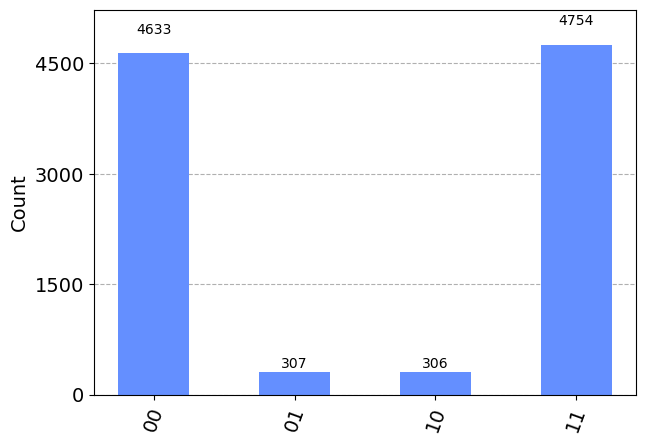

In [18]:
plot_histogram(noisy_counts)

## 0.4.4 Running on Fake Backends

In [19]:
from qiskit.providers.fake_provider import FakeManila

In [20]:
fake_backend = FakeManila()

In [21]:
fake_backend_counts = fake_backend.run(qc_trans, shots=10000).result().get_counts()
fake_backend_counts

{'01': 432, '11': 3793, '00': 4568, '10': 1207}

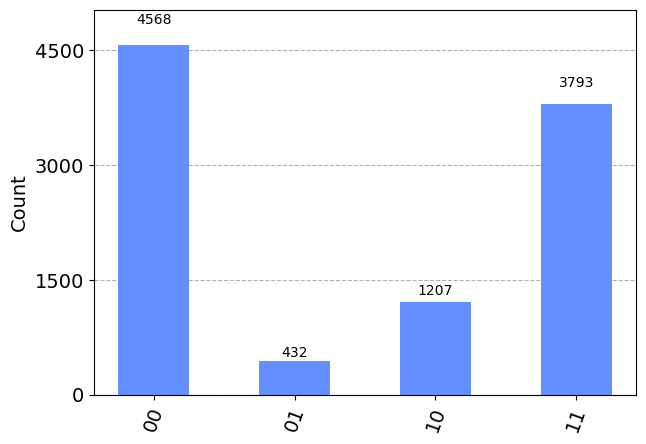

In [22]:
plot_histogram(fake_backend_counts)

---

# 1. Measuring Observables


Helpful Qiskit related resources
- [Qiskit Textbook: Single Systems](https://learn.qiskit.org/course/basics/single-systems)
- [Qiskit: Textbook: Multiple Systems](https://learn.qiskit.org/course/basics/multiple-systems)
- [Mitigating Noise on Real Quantum Computers](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8)


Other relevant materials
- [Feynman Lectures Ch. III - 12](https://www.feynmanlectures.caltech.edu/III_12.html)
- [Quantum Operation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
- [Interactive Bloch Sphere](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere)
- [Measurement Error Mitigation](https://learn.qiskit.org/course/quantum-hardware/measurement-error-mitigation)

## 1.1 Measure the state of a qubit

Fundamental to the operation of a quantum computer is the ability to compute the Bloch components of a qubit or qubits. These components correspond to the expectation values of the Pauli operators $X, Y, Z$, and are important quantities for applications such as quantum chemistry and optimization.  Unfortunately, it is impossible to simultaneously compute these values, thus requiring many executions of the same circuit.  In addition, measurements are restricted to the computational basis (Z-basis) so that each Pauli needs to be rotated to the standard basis to access the x and y components.  Here we verify the methods by considering the case of a random vector on the Bloch sphere.

***

### 1.1.1 Express the expectation values of the Pauli operators for an arbitrary qubit state $|q\rangle$ in the computational basis. </h3>

The case for the expectation value of Pauli Z gate is given as an example.  Write out the expectation values for $\langle X \rangle$ and $\langle Y \rangle$ in the same representation.

Using the diagonal representation, also known as the spectral form or orthonormal decomposition, of the Pauli $Z$ gate and the relations among the Pauli gates (see section 1.2 of this [qiskit textbook page](https://learn.qiskit.org/course/ch-states/single-qubit-gates)), expectation values of $ X, Y, Z $ gates can be written using $ X=HZH$ and $Y = SXS^\dagger$ as  

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2\\\nonumber\\
\langle X \rangle &=  \langle q | HZH | q\rangle = \langle q|H|0\rangle\langle 0|H|q\rangle - \langle q|H|1\rangle\langle 1|H|q\rangle
=|\langle 0 |H|q\rangle|^2 - |\langle 1 |H| q\rangle|^2\\\nonumber\\
\langle Y \rangle &=\langle q | SHZHS^\dagger | q\rangle = \langle q|SH|0\rangle\langle 0|HS^\dagger|q\rangle - \langle q|SH|1\rangle\langle 1|HS^\dagger|q\rangle \\\nonumber\\
\end{align}
\\
$$


Hint: We are restricted to only being able to measure in the standard computational basis.  Therefore, in order to obtain the expectation values of the Paulis for a qubit state $|q\rangle$, we have to rotate the standard basis frame to lie along the axis we wish to measure. The probabilities of obtaining the two possible outcomes 0 and 1 are then used to evaluate the desired expectation value as the above equations show.

### 1.1.2 Measure the Bloch sphere coordinates of a qubit using the Aer simulator and plot the vector on the Bloch sphere

**Step A.** Create a qubit state using the circuit method, <code>initialize</code> with two random complex numbers as the parameter.

To learn how to use the function `initialize`, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Arbitrary-initialization). (go to the `arbitrary initialization` section.)

In [23]:
qc = QuantumCircuit(1, 1)

#### your code goes here
shape = 1
complex_vec1 = np.sqrt(np.random.uniform(0, 1, shape)) * np.exp(1.j * np.random.uniform(0, 2 * np.pi, shape))
complex_vec2 = np.sqrt(np.random.uniform(0, 1, shape)) * np.exp(1.j * np.random.uniform(0, 2 * np.pi, shape))


complex_vec = np.array([complex_vec1[0], complex_vec2[0]])
norm = np.linalg.norm(complex_vec)
print("Unormalized: {}".format(complex_vec))


complex_vec = np.array([(1/norm)*complex_vec[0], (1/norm)*complex_vec[1]])
new_norm = np.linalg.norm(complex_vec)
print("Normalize: {}".format(complex_vec))
print('Norm: {}'.format(new_norm))



qc.initialize(complex_vec, [0])
qc.draw()



Unormalized: [ 0.25650767+0.92041515j -0.11992229+0.654241j  ]
Normalize: [ 0.22032865+0.79059554j -0.10300789+0.56196383j]
Norm: 1.0


┌───────────────────────────────────────────────┐
  q: ┤ Initialize(0.22033+0.7906j,-0.10301+0.56196j) ├
     └───────────────────────────────────────────────┘
c: 1/═════════════════════════════════════════════════

**Step B.** Build the circuits to measure the expectation values of $X, Y, Z$ gate based on your answers to the question 1.  Run the cell below to estimate the Bloch sphere coordinates of the qubit from step A using the Aer simulator.</h4>

The circuit for $Z$ gate measurement is given as an example.

In [24]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)



# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
#### your code goes here
measure_x.h(0)
measure_x.measure(0,0)




# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
#### your code goes here
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0)





shots = 2**12 # number of samples used for statistics
sim = AerSimulator()
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    circ_plus_meas = qc.compose(measure_circuit)
    print(circ_plus_meas)

    counts = sim.run(circ_plus_meas, shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/np.linalg.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

     ┌───────────────────────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.22033+0.7906j,-0.10301+0.56196j) ├┤ H ├┤M├
     └───────────────────────────────────────────────┘└───┘└╥┘
c: 1/═══════════════════════════════════════════════════════╩═
                                                            0 
     ┌───────────────────────────────────────────────┐┌─────┐┌───┐┌─┐
  q: ┤ Initialize(0.22033+0.7906j,-0.10301+0.56196j) ├┤ Sdg ├┤ H ├┤M├
     └───────────────────────────────────────────────┘└─────┘└───┘└╥┘
c: 1/══════════════════════════════════════════════════════════════╩═
                                                                   0 
     ┌───────────────────────────────────────────────┐┌─┐
  q: ┤ Initialize(0.22033+0.7906j,-0.10301+0.56196j) ├┤M├
     └───────────────────────────────────────────────┘└╥┘
c: 1/══════════════════════════════════════════════════╩═
                                                       0 
The Bloch sphere coordinates are [0.836, 0.40

### Using `qiskit.result.sampled_expectation_value`

In [25]:
from qiskit.result import sampled_expectation_value

shots = 2**12 # number of samples used for statistics
sim = AerSimulator()
bloch_vector_measure = []
oper = "Z"
for measure_circuit in [measure_x, measure_y, measure_z]:
    circ_plus_meas = qc.compose(measure_circuit)

    counts = sim.run(circ_plus_meas, shots=shots).result().get_counts()

    # using sampled_expectation_value
    expval = sampled_expectation_value(dist=counts, oper=oper)
            
    bloch_vector_measure.append(expval)

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/np.linalg.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

The Bloch sphere coordinates are [0.849, 0.400, 0.346]


***Step C.*** Plot the vector on the Bloch sphere.</h4>

Note that the following cell for the interactive bloch_sphere will not run properly unless you install `kaleidoscope`. You can either use `plot_bloch_vector` for the non-interactive version or install the module by running 

```
pip install kaleidoscope
```
in a terminal if you haven't already installed it.  You also need to restart your kernel after the installation.  To learn more about how to use the interactive Bloch sphere, go [here](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere).

In [26]:
from kaleidoscope.interactive import bloch_sphere

bloch_sphere(bloch_vector, vectors_annotation=True)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


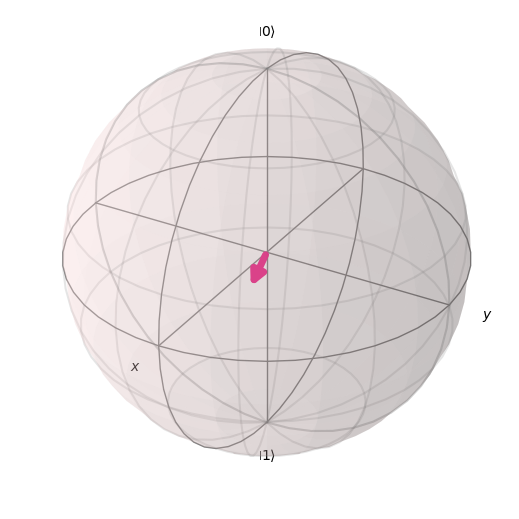

In [27]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )

***

## 1.2 Measure the Energy of a Quantum System

The energy of a quantum system can be estimated by measuring the expectation value of its Hamiltonian, which is a Hermitian operator, through the procedure we mastered in part 1.  Here we'll use the ground state of a Hydrogen atom as a simple example.

The ground state of hydrogen is not defined as a single unique state but actually contains four different states due to the spins of the electron and proton. In part 2 of this lab, we evaluate the energy difference among these four states, which is from the `hyperfine splitting`, by computing the energy expectation value for the system of two spins with the Hamiltonian expressed in Pauli operators.


Consider a system with a two qubit Hamiltonian of the form $$H = A(XX+YY+ZZ)$$ where $A = 1.47e^{-6} eV$ and $X, Y, Z$ are Pauli gates. Then the energy expectation value of the system can be evaluated by combining the expectation value of each term in the Hamiltonian.
In this case, $E = \langle H\rangle = A( \langle XX\rangle + \langle YY\rangle + \langle ZZ\rangle )$. 

***

### 1.2.1 Express the expectation value of each term in the Hamiltonian for an arbitrary two qubit state   $|\psi \rangle$ in the computational basis.</h3>

The case for the term $\langle ZZ\rangle$ is given as an example.

$$
\begin{align}
\langle ZZ\rangle &=\langle \psi | ZZ | \psi\rangle =\langle \psi|(|0\rangle\langle 0| - |1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle
=|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2\\ \nonumber\\
\langle XX\rangle &= \langle \psi | HZH\otimes HZH | \psi\rangle =\langle \psi|(H|0\rangle\langle 0| - |1\rangle\langle 1|H)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle\\\nonumber\\
\langle YY\rangle &= 
\end{align}
$$

***

### 1.2.2 Measure the expected energy of the system using the Aer simulator when two qubits are entangled. Regard the bell basis, four different entangled states.</h3>

***Step A.*** Construct the circuits to prepare four different bell states.</h4>

Let's label each bell state as
$$
\begin{align}
Tri1 &= \frac{1}{\sqrt2} (|00\rangle + |11\rangle)\\
Tri2 &= \frac{1}{\sqrt2} (|00\rangle - |11\rangle)\\
Tri3 &= \frac{1}{\sqrt2} (|01\rangle + |10\rangle)\\
Sing &= \frac{1}{\sqrt2} (|10\rangle - |01\rangle)
\end{align}
$$


*Hint: Use the [`Statevector`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) object from `qiskit.quantum_info` to check your work.  Initalize it using the quantum circuit and check the `Statevector.data` attribute.*

In [28]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2, 2)
# your code goes here
Tri1.h(0)
Tri1.cx(0,1)





# circuit for the state Tri2
Tri2 = QuantumCircuit(2, 2)
# your code goes here
Tri2.h(0)
Tri2.cx(0,1)
Tri2.z(1)





# circuit for the state Tri3
Tri3 = QuantumCircuit(2, 2)
# your code goes here
Tri3.h(0)
Tri3.cx(0,1)
Tri3.x(0)





# circuit for the state Sing
Sing = QuantumCircuit(2, 2)
# your code goes here
Sing.h(0)
Sing.cx(0,1)
Sing.x(0)
Sing.z(0)







In [29]:
from qiskit.quantum_info import Statevector

Tri2_sv = Statevector(Tri2)
print(Tri2_sv.data)

Tri3_sv = Statevector(Tri3)
print(Tri3_sv.data)

Sing_sv = Statevector(Sing)
print(Sing_sv.data)

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
[ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]


***Step B.*** Create the circuits to measure the expectation value of each term in the Hamiltonian based on your answer to question 1.</h4>

In [30]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)
# your code goes here
measure_XX.h(0)
measure_XX.h(1)
measure_XX.measure_all()




# <YY>
measure_YY = QuantumCircuit(2)
# your code goes here
measure_YY.sdg(0)
measure_YY.sdg(1)
measure_YY.h(0)
measure_YY.h(1)
measure_YY.measure_all()





***Step C.*** Execute the circuits on Aer simulator by running the cell below and evaluate the energy expectation value for each state.</h4>

In [31]:
shots = 2**10 # number of samples used for statistics


sim = AerSimulator()

A = 1.47e-6 #unit of A is eV
E_sim = []
oper = "ZZ"
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim) # with ideal simualtor, transpile call is optional
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
#         probs = {}
#         for output in ['00','01', '10', '11']:
#             if output in counts:
#                 probs[output] = counts[output]/shots
#             else:
#                 probs[output] = 0
        # using sampled_expectation_value
        expval = sampled_expectation_value(dist=counts, oper=oper)
            
#         Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
        Energy_meas.append(expval)
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

In [32]:
# Run this cell to print out your results

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E_sim[3]))

Energy expectation value of the state Tri1 : 1.470e-06 eV
Energy expectation value of the state Tri2 : 1.470e-06 eV
Energy expectation value of the state Tri3 : 1.470e-06 eV
Energy expectation value of the state Sing : -4.410e-06 eV


***Step D.*** Understanding the result. </h4>

If you found the energy expectation values successfully, you should have obtained exactly the same value, $A (= 1.47e^{-6} eV)$, for the triplet states, $|Tri1\rangle, |Tri2\rangle, |Tri3\rangle$ and one lower energy level, $-3A (= -4.41e^{-6} eV)$ for the singlet state $|Sing\rangle$.   

What we have done here is measure the energies of the four different spin states corresponding to the ground state of hydrogen and observe the `hyperfine structure` in the energy levels caused by spin-spin coupling.  This tiny energy difference between the singlet and triplet states is the reason for the famous 21-cm wavelength radiation used to map the structure of the galaxy.  

***

## 1.3 Execute the circuits on a Quantum Computer (noisy simulator)

In this section, we will re-run the circuits on a IBM quantum system and perform measurement error mitigation on the result to improve the accuracy in the energy estimation.

***Step A.*** Run the following cells to select a backend.  Since queue times are quite long, this lab will utilize a noisy simulator as the backend to run your circuits on.  If you wish to run on real hardware, simply change all references of the `noisy_sim` variable to the `backend` variable defined below.

In [33]:
backend = provider.get_backend('ibmq_manila') 

noisy_sim = AerSimulator.from_backend(backend)

***Step B.*** Execute the circuits on the quantum system. </h4>

Here we will execute our circuits in a list

In [34]:
qc_all = [
    state_init.compose(measure_circuit)
    for state_init in [Tri1,Tri2,Tri3,Sing] 
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]
]  

shots = 8192
qc_all_trans = transpile(qc_all, noisy_sim, optimization_level=3)
job = noisy_sim.run(qc_all_trans, shots=shots)
print(job.job_id())

dbb45dbf-7c78-472f-b737-fd7543ce66cf


In [35]:
# getting the results of your job
results = job.result()

In [36]:
## To access the results of the completed job.  Use the job id from two cells above
# NOTE: ONLY WORKS IF YOU USE A REAL BACKEND
#results = noisy_sim.retrieve_job('job_id').result()

***Step C.*** Estimate the ground state energy levels from the results of the previous step by executing the cells below.

In [37]:
def Energy(results, oper="ZZ"):
    """Compute the energy levels of the hydrogen ground state.
    
    Parameters:
        results (obj): results, results from executing the circuits for measuring a Hamiltonian.
        shots (int): shots, number of shots used for the circuit execution.
        
    Returns:
        Energy (list): energy values of the four different hydrogen ground states
    """
    E = []
    A = 1.47e-6

    for ind_state in range(4):
        Energy_meas = []
        for ind_comp in range(3):
            counts = results.get_counts(ind_state*3+ind_comp)
        
            # calculate the probabilities for each computational basis
#             probs = {}
#             for output in ['00','01', '10', '11']:
#                 if output in counts:
#                     probs[output] = counts[output]/shots
#                 else:
#                     probs[output] = 0
            expval = sampled_expectation_value(dist=counts, oper=oper)
            
            Energy_meas.append(expval)

        E.append(A * np.sum(np.array(Energy_meas)))
    
    return E

In [38]:
E = Energy(results, oper="ZZ")

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E[3]))

Energy expectation value of the state Tri1 : 1.354e-06 eV
Energy expectation value of the state Tri2 : 1.367e-06 eV
Energy expectation value of the state Tri3 : 1.296e-06 eV
Energy expectation value of the state Sing : -4.013e-06 eV


## 1.4 Measurement Error Mitigation

Results obtained from running the circuits on the quantum system are not exact due to the noise from the various sources such as energy relaxation, dephasing, crosstalk between qubits, etc. In this step, we will alleviate the effects of the noise through measurement error mitigation.  This is an error mitigation technqiue which reduces a simpler form of noise, which occurs during the final measurement of the qubits.  At this point, the only job remaining in the circuit is to extract a bit string as an output. For an $n$ qubit final measurement, this means extracting one of the possible $2^n$ bit strings. As a simple model of the noise in this process, we can imagine that the measurement first selects one of these outputs in a perfect and noiseless manner, and then noise subsequently causes this perfect output to be randomly perturbed before it is returned to the user.


Given this model, it is very easy to determine exactly what the effects of measurement errors are. We can simply prepare each of the 
$2^n$ possible basis states, immediately measure them, and see what probability exists for each outcome.

This [video](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8) provides a nice summary if you're interested.  These exercises below are also inspired by the this [lesson](https://learn.qiskit.org/course/quantum-hardware/measurement-error-mitigation) in the Qiskit textbook.




Constructing this as a linear algebra problem, we can then algorithmically construct a post-processing technique which reduces the overall error due to stochastic variations in measurement.  We start by considering a vector $\vec{p}$ representing the set of "true" measurement probabilities we would obtain without the presence of noise.  When a given circuit is run experimentally, we obtain a set of noisy measurement probabilities $\vec{p_n}$.


If we then create a set of circuits which prepares and measures each of the $2^n$ basis states, we can construct a calibration matrix $A$ knowing that $$ \vec{p_n} = A\vec{p}. $$

This matrix can then be used for some future quantum algorithm we wish to execute.  A future experiments "true" measurement probabilities $\vec{p'}$ can then be found by computing the inverse of our calibration matrix $$ \vec{p'} = A^{-1}\vec{p'_n}. $$

Your duty here is then to use the error mitigation tools built within qiskit to improve the results you obtained measuring the hyperfine splitting of hydrogen.

But first, since the queue times are typically quite long, it'd be great to not have to wait many many hours before the lab is completed.  What we'll do here is construct an `AerSimulator` backend with a noise model.  We'll then use this artificial noisy backend to construct our calibration matrix we'll use to post-process our noisy results.

In [39]:
backend = provider.get_backend('ibmq_manila')
sim = AerSimulator.from_backend(backend)

<div class="alert alert-warning">
   <div>
       <big><b>Note</b></big>
   </div>
   <br>
    It is paramount to know for which qubits we should run measurement calibration. We need to take a look at the `final_layout` of the transpiled circuits `transpiled_circuit.layout.final_layout`. For some circuits, `final_layout` can be `None`. In such cases, `final_layout` is the same as the `initial_layout`. `final_layout` tells us which physical (device) qubits are readout at the end. Readout errors of those qubits are of interest.
</div>

In [40]:
qc_all_trans[0].layout

TranspileLayout(initial_layout=Layout({
3: Qubit(QuantumRegister(2, 'q'), 0),
2: Qubit(QuantumRegister(2, 'q'), 1),
0: Qubit(QuantumRegister(3, 'ancilla'), 0),
1: Qubit(QuantumRegister(3, 'ancilla'), 1),
4: Qubit(QuantumRegister(3, 'ancilla'), 2)
}), input_qubit_mapping={Qubit(QuantumRegister(2, 'q'), 0): 0, Qubit(QuantumRegister(2, 'q'), 1): 1, Qubit(QuantumRegister(3, 'ancilla'), 0): 2, Qubit(QuantumRegister(3, 'ancilla'), 1): 3, Qubit(QuantumRegister(3, 'ancilla'), 2): 4}, final_layout=None)

For above example, physical qubits `[3, 2]` were read at the end. 
(See physical qubits for `Qubit(QuantumRegister(2, 'q'), 0)` and `Qubit(QuantumRegister(2, 'q'), `)`)

In your `complete_meas_cal` call, supply an extra parameter `qubit_list=[3, 2]`,

In [41]:
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter
# your code to create the circuits, meas_calibs, goes here

num_qubits_in_backend = sim.configuration().num_qubits
qr = QuantumRegister(num_qubits_in_backend)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal', qubit_list=[3, 2])


# for circuit in meas_calibs:
#     print('Circuit',circuit.name)
#     print(circuit)


# execute meas_calibs on your choice of the backend
# meas_calibs_trans = transpile(meas_calibs, sim, optimization_level=3)
#job = backend.run(meas_calibs_trans, backend, shots = shots)
job = execute(meas_calibs, sim, shots=shots)
print(job.job_id())
cal_results = job.result()



# your code to obtain the measurement filter object, 'meas_filter', goes here

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

a2112b6d-10c3-4e28-b6b8-76a4e008ae0f
[[9.62158203e-01 1.83105469e-02 1.64794922e-02 6.10351562e-04]
 [1.79443359e-02 9.64477539e-01 4.88281250e-04 2.09960938e-02]
 [1.94091797e-02 3.66210938e-04 9.65820312e-01 1.58691406e-02]
 [4.88281250e-04 1.68457031e-02 1.72119141e-02 9.62524414e-01]]


/var/folders/xj/4k8zh7rs25vgnvh3l1nsmc680000gp/T/ipykernel_4723/3442940444.py:6: DeprecationWarning:

The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.

/var/folders/xj/4k8zh7rs25vgnvh3l1nsmc680000gp/T/ipykernel_4723/3442940444.py:32: DeprecationWarning:

The class ``qiskit.utils.mitigation.fitters.CompleteMeasFitter`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.



In [42]:
meas_filter = meas_fitter.filter

results_new = meas_filter.apply(results)

In [43]:
E_new = Energy(results_new)

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E_new[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E_new[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E_new[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E_new[3]))

Energy expection value of the state Tri1 : 1.471e-06 eV
Energy expection value of the state Tri2 : 1.485e-06 eV
Energy expection value of the state Tri3 : 1.409e-06 eV
Energy expection value of the state Sing : -4.309e-06 eV


**Step E.** Interpret the result. </h4>

Compute the relative errors ( or the fractional error ) of the energy values for all four states with and without measurement error mitigation.

In [44]:
# results for the energy estimation from the simulation, 
# execution on a quantum system without error mitigation and
# with error mitigation in numpy array format 
Energy_exact, Energy_exp_orig, Energy_exp_new = np.array(E_sim), np.array(E), np.array(E_new)

In [45]:
# Calculate the relative errors of the energy values without error mitigation 
# and assign to the numpy array variable `Err_rel_orig` of size 4
Err_rel_orig = (Energy_exact - Energy_exp_orig)/Energy_exact

In [46]:
# Calculate the relative errors of the energy values with error mitigation 
# and assign to the numpy array variable `Err_rel_new` of size 4
Err_rel_new = (Energy_exact - Energy_exp_new)/Energy_exact

In [47]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 without measurement error mitigation : {}'.format(Err_rel_orig))

The relative errors of the energy values for four bell basis without measurement error mitigation : [0.079 0.07  0.118 0.09 ]


In [48]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 with measurement error mitigation : {}'.format(Err_rel_new))

The relative errors of the energy values for four bell basis with measurement error mitigation : [-0.001 -0.011  0.042  0.023]


Compare the size of the errors before and after the measurment error mitigation and discuss about the effect of the readout error regarding the error map information of the backend that you selected.</b><p>  

# Epilogue: A Quick Note About Using Qiskit Runtime

In this lab we focused on a model of generating circuits we want to run on the backend, then using the `execute` function to send them off.  However this job submission model is changing in favor of Qiskit Runtime.  Qiskit Runtime is a quantum computing service and programming model that allows users to optimize workloads and efficiently execute them on quantum systems at scale. The programming model extends the existing interface in Qiskit with a set of new *primitives*.  Below is a high level overview of this framework, describing the journey quantum circuit(s) will take from your local machine, executing on the hardware, and back.


<img src="./resources/qiskit-runtime.png" alt="Qiskit Runtime Overview" style="width: 1000px;"/>

## Key Concepts

### Primitives
Primitives provide a simplified interface for defining near-time quantum-classical workloads required to efficiently build and customize applications. The initial release of Qiskit Runtime includes two primitives: Estimator and Sampler. They perform foundational quantum computing tasks and act as an entry point to the Qiskit Runtime service.

#### Sampler
The Sampler primitive takes a circuit as an input and generates an error-mitigated readout of quasiprobabilities. This provides users a way to better evaluate shot results using error mitigation and enables them to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.

#### Estimator
The Estimator primitive takes circuits and observables and allows users to selectively group between circuits and observables for execution to efficiently evaluate expectation values and variances for a given parameter input. This primitive allows users to efficiently calculate and interpret expectation values of quantum operators required for many algorithms.

If you'd like to learn more about how to use this framework, feel free to explore/read over the links below.

Reference Qiskit Runtime getting started: https://qiskit.org/ecosystem/ibm-runtime/getting_started.html
Getting started with Runtime on IBM Quantum Platform: https://quantum-computing.ibm.com/lab/docs/iql/runtime/start

Introduce Sample Primitive: https://qiskit.org/ecosystem/ibm-runtime/tutorials/how-to-getting-started-with-sampler.html
Introduce Estimator Primitive: https://qiskit.org/ecosystem/ibm-runtime/tutorials/how-to-getting-started-with-estimator.html

## Computing energy of a obeservable using `Estimator` primitive

In [49]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

In [50]:
service = QiskitRuntimeService(instance=instance)

In [51]:
session = Session(service=service, backend="ibmq_qasm_simulator")
estimator = Estimator(session=session)

In [52]:
# Runtime Estimator does not need explicit measure ops. 
circuits = [Tri1,Tri2,Tri3,Sing]

In [53]:
from qiskit.quantum_info import SparsePauliOp
# ZZ + XX + YY
oper = SparsePauliOp(["ZZ", "XX", "YY"], [1, 1, 1]) # 1st list: Pauli Ops, 2nd list: co-effs

In [54]:
job = estimator.run(circuits, [oper]*len(circuits))
result = job.result()

In [55]:
result.values # contains the energy of the provided observable

array([ 1.,  1.,  1., -3.])

In [56]:
A = 1.47e-6 #unit of A is eV
print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(A*result.values[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(A*result.values[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(A*result.values[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(A*result.values[3]))

Energy expectation value of the state Tri1 : 1.470e-06 eV
Energy expectation value of the state Tri2 : 1.470e-06 eV
Energy expectation value of the state Tri3 : 1.470e-06 eV
Energy expectation value of the state Sing : -4.410e-06 eV


Same can be tested locally (without opening RuntimeService and Session) using `qiskit.primitives`

In [57]:
from qiskit.primitives import Estimator

In [58]:
estimator = Estimator()
job = estimator.run(circuits, [oper]*len(circuits))
result = job.result()
result.values

array([ 1.,  1.,  1., -3.])

# Summary

- How to run on ideal and noisy simulator and real backend
- How to perform measurement basis change for non-default X and Y basis measurements.
    - Add an extra `H` gate for X basis
    - Add a sequence of `SDG` followed by a `H` for Y basis
- How to compute expectation values using `qiskit.result.sampled_expectation_value`.
- How to compute expectation values (and energy) of an observable using `Estimator`.
